In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df1=pd.read_csv('Salary_Data.csv')

In [16]:
df2=pd.read_csv('insurance.csv')

In [17]:
# 2 - Resume statistique
print('Dataset Experience / Salaire')
print(df1.head())

print(df1.describe())


Dataset Experience / Salaire
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


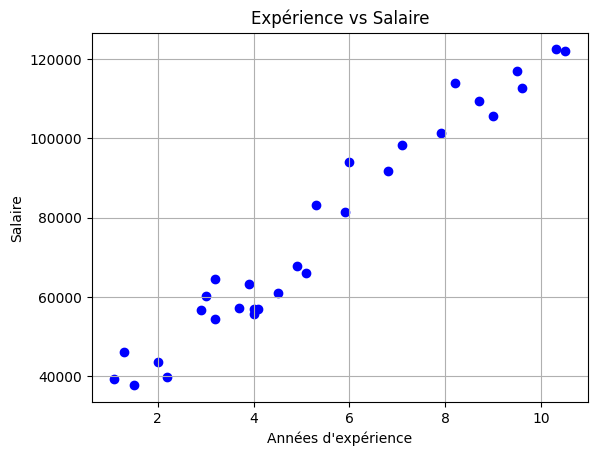

In [18]:

import matplotlib.pyplot as plt

# Nuage des points - Expérience vs Salaire
plt.scatter(df1['YearsExperience'], df1['Salary'], color='blue')
plt.title("Expérience vs Salaire")
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.grid(True)
plt.show()


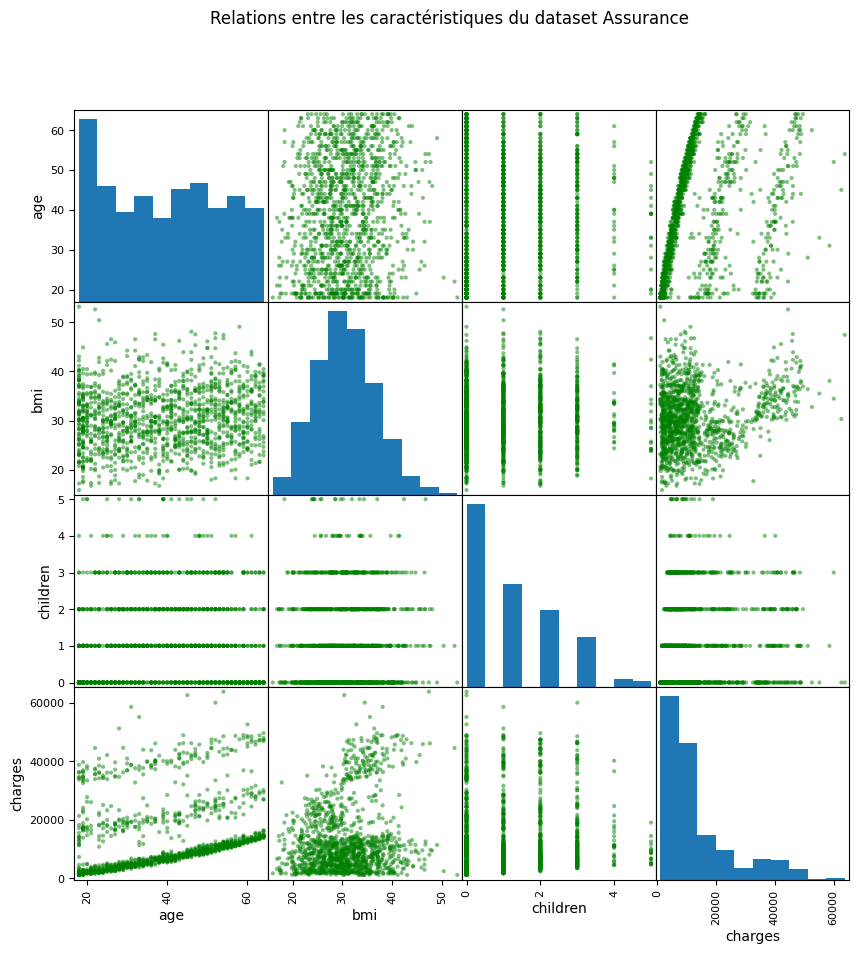

In [19]:
from pandas.plotting import scatter_matrix

# Nuages des points entre les features du dataset Assurance
scatter_matrix(df2, figsize=(10, 10), diagonal='hist', color='green')
plt.suptitle("Relations entre les caractéristiques du dataset Assurance")
plt.show()
